In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['who_suicide_statistics.csv']


In [23]:
df = pd.read_csv("../input/who_suicide_statistics.csv")

Let's check some samples

In [24]:
df.sample(3)

,country,year,sex,age,suicides_no,population
15309,Georgia,1996,male,5-14 years,1.0,369200.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


Seems like there are some Nan's

In [26]:
df.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [27]:
df.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [28]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [29]:
df.shape

(43776, 6)

In [31]:
df = df[~df.population.isna()]

In [32]:
df.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population        0
dtype: int64

In [34]:
df = df[~df.suicides_no.isna()]

In [35]:
df.isna().sum()

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0
29,Albania,1987,female,75+ years,1.0,35600.0
30,Albania,1987,male,15-24 years,21.0,312900.0
31,Albania,1987,male,25-34 years,9.0,274300.0
32,Albania,1987,male,35-54 years,16.0,308000.0
33,Albania,1987,male,5-14 years,0.0,338200.0


In [38]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'Hong Kong SAR', 'Hungary',
       'Iceland', 'Iran (Islamic Rep of)', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau',
       'Maldives', 'Malta', 'Martinique', 'Mauritius', 'Mayotte',
       'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New 

In [39]:
df.year.unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1983, 1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 1979, 1980,
       1981, 1982, 1984, 2011, 2016])

I would like to consider only the last decade for analysis

In [44]:
df = df[df.year > 2006]

I would like to add new column "percent_ratio" which calculates the percentage suicides based on population

In [49]:
df["percent_ratio"] =  100*df.suicides_no/df.population

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df.head()

,country,year,sex,age,suicides_no,population,percent_ratio
264,Albania,2007,female,15-24 years,13.0,281080.0,0.004625
265,Albania,2007,female,25-34 years,8.0,183629.0,0.004357
266,Albania,2007,female,35-54 years,14.0,391811.0,0.003573
267,Albania,2007,female,5-14 years,0.0,256808.0,0.000000
268,Albania,2007,female,55-74 years,9.0,221120.0,0.004070


let's start plotting

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Gender vs Suicides Ratio')

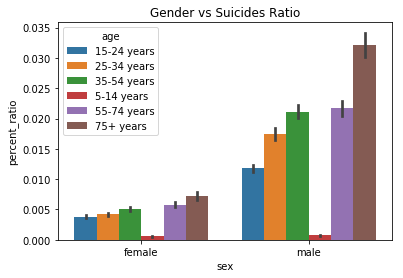

In [54]:
sns.barplot(x = "sex", y = "percent_ratio", data = df, hue = "age").set_title("Gender vs Suicides Ratio")

As you can see,
1. Males have higher suicide rates compared to that of females
2. Higher the age, Higher the suicide rates

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Years vs Suicide rates')

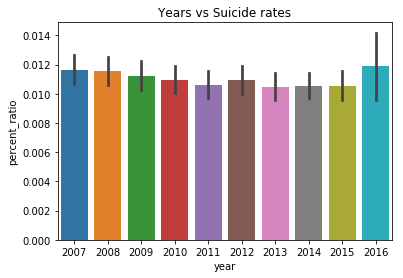

In [71]:
sns.barplot(x = "year", y = "percent_ratio", data = df).set_title("Years vs Suicide rates")

The average suicide rates have decreasd till 2011, and in 2016 it's increasing.

In [63]:
df[(df.year>2011)].sort_values(by = ["percent_ratio"], ascending = False)[:10]

,country,year,sex,age,suicides_no,population,percent_ratio
37607,Suriname,2012,male,75+ years,10.0,5346.0,0.187056
31667,Republic of Korea,2012,male,75+ years,1137.0,745816.0,0.152450
31679,Republic of Korea,2013,male,75+ years,1191.0,806960.0,0.147591
31703,Republic of Korea,2015,male,75+ years,1329.0,944284.0,0.140742
31691,Republic of Korea,2014,male,75+ years,1090.0,875829.0,0.124454
36323,Slovenia,2012,male,75+ years,60.0,55583.0,0.107947
32491,Rodrigues,2016,male,25-34 years,3.0,2801.0,0.107105
18599,Hungary,2012,male,75+ years,233.0,232766.0,0.100101
36359,Slovenia,2015,male,75+ years,62.0,62345.0,0.099447
36335,Slovenia,2013,male,75+ years,57.0,57600.0,0.098958


As we can see, highest suicide ratio is for Suriname, RoK,Slovenia

From 2012,2016 below are the nation with average suicides greater than 0.08%

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

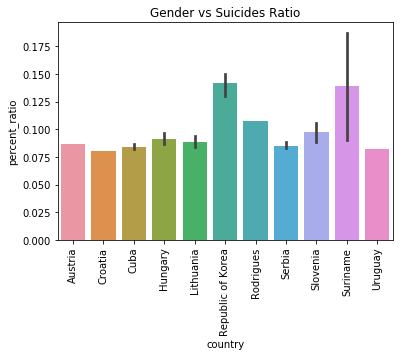

In [70]:
sns.barplot(x = "country", y = "percent_ratio", data = df[(df.year>2011)&(df.percent_ratio > 0.08)]).set_title("Country vs Suicides Ratio")
plt.xticks(rotation = 90)

(editing......)